In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

In [3]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

<Axes: >

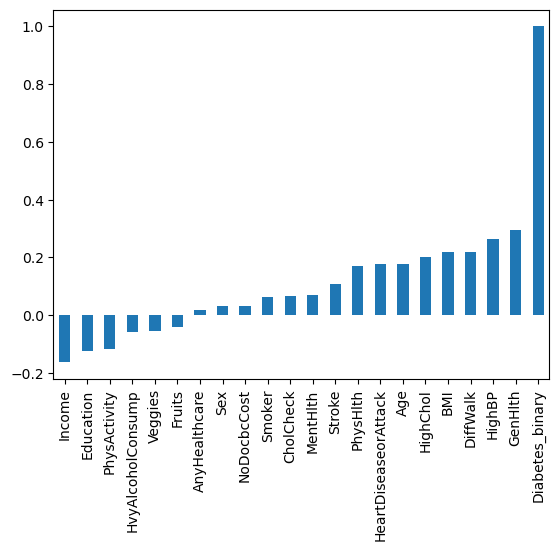

In [8]:
df.corr()["Diabetes_binary"].sort_values().plot(kind = "bar")

In [9]:
sns.pairplot(df)

Error in callback <function flush_figures at 0x0000020A675003A0> (for post_execute):


KeyboardInterrupt: 

In [12]:
df.shape[1]

22

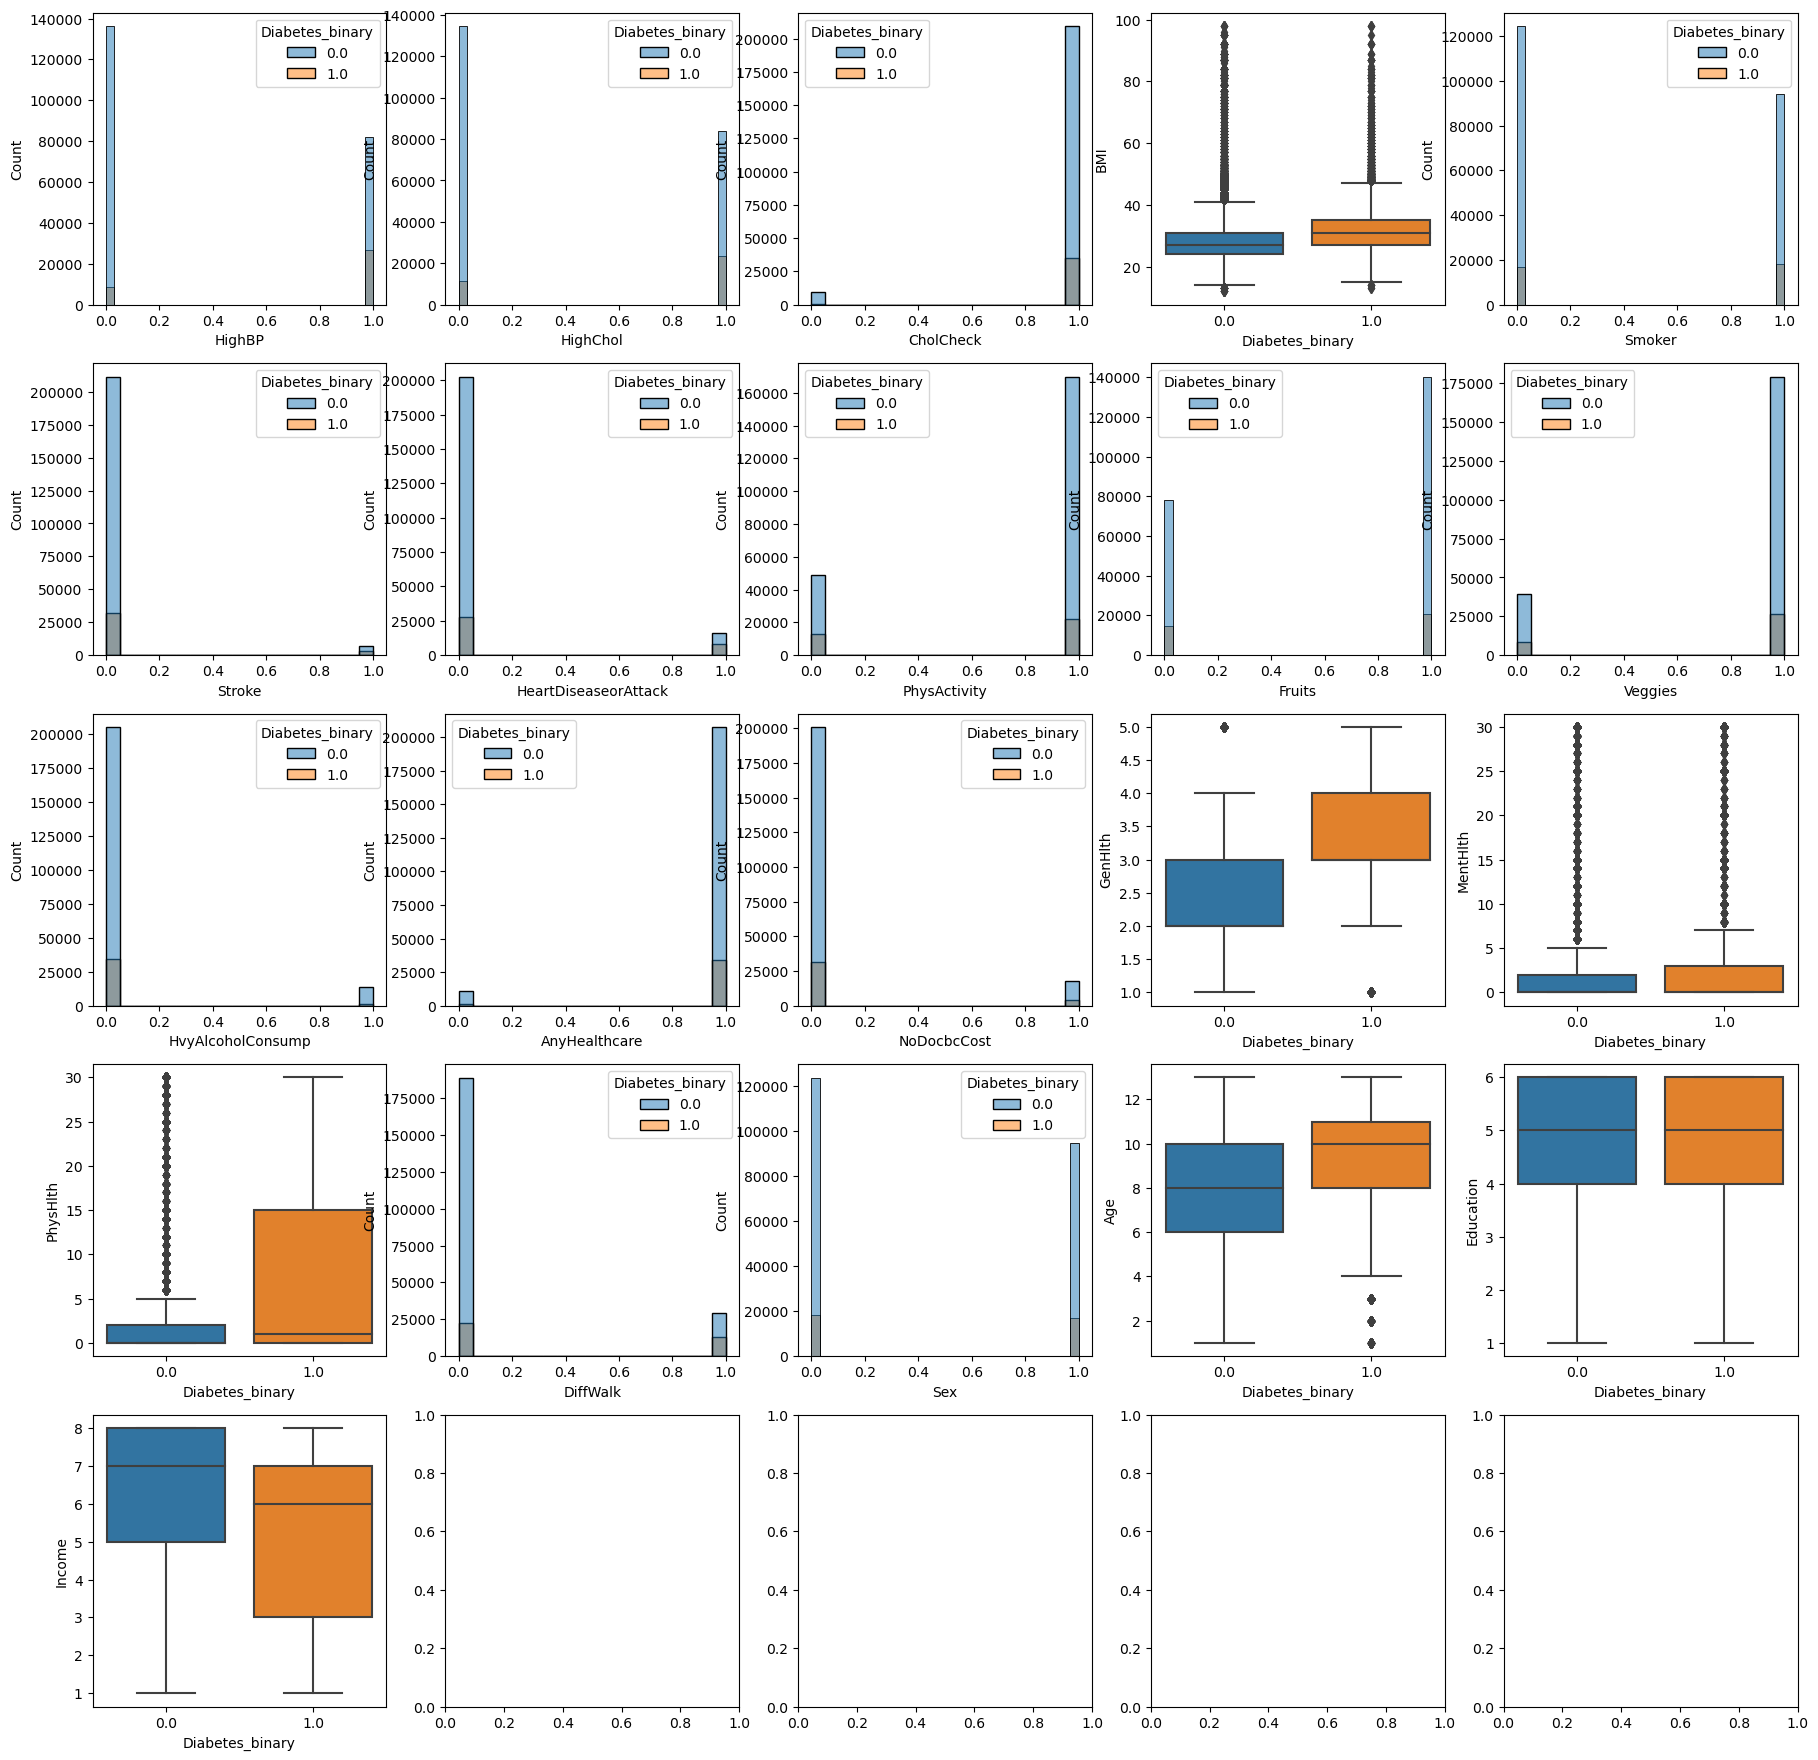

In [72]:
counter = 1
fig, axs = plt.subplots(5,5, figsize = (22,22))
for i in range(5):
    for j in range(5):
        ax = axs[i,j]
        if df[df.columns[counter]].nunique() == 2:
            sns.histplot(data =df , x = df.columns[counter], hue = "Diabetes_binary", ax = ax)
        else: 
            sns.boxplot(data=df, x="Diabetes_binary", y=df.columns[counter],  ax = ax)
        counter +=1
        if counter == len(df.columns):
            break
        


In [106]:
#lets start with the BMI
df[df["BMI"] > 40].shape[0]/df.shape[0] # 5percent of the data is a BMI outlier

0.04524992116051719

In [107]:
df[df["BMI"] > 40]["Diabetes_binary"].value_counts()

0.0    7596
1.0    3883
Name: Diabetes_binary, dtype: int64

In [108]:
df = df[df["BMI"] < 40] #  filter out those points

In [168]:
def make_figures(df):
    counter = 1
    fig, axs = plt.subplots(5,5, figsize = (22,22))
    for i in range(5):
        for j in range(5):
            ax = axs[i,j]
            if df[df.columns[counter]].nunique() == 2:
                sns.histplot(data =df , x = df.columns[counter], hue = "Diabetes_binary", ax = ax)
            else: 
                sns.boxplot(data=df, x="Diabetes_binary", y=df.columns[counter],  ax = ax)
            counter +=1
            if counter == len(df.columns):
                break
    

In [110]:
df[df.MentHlth > 20].shape[0]/df.shape[0] 

0.06634909124250343

In [114]:
df[df.MentHlth > 20].Diabetes_binary.value_counts()

0.0    10113
1.0     2577
Name: Diabetes_binary, dtype: int64

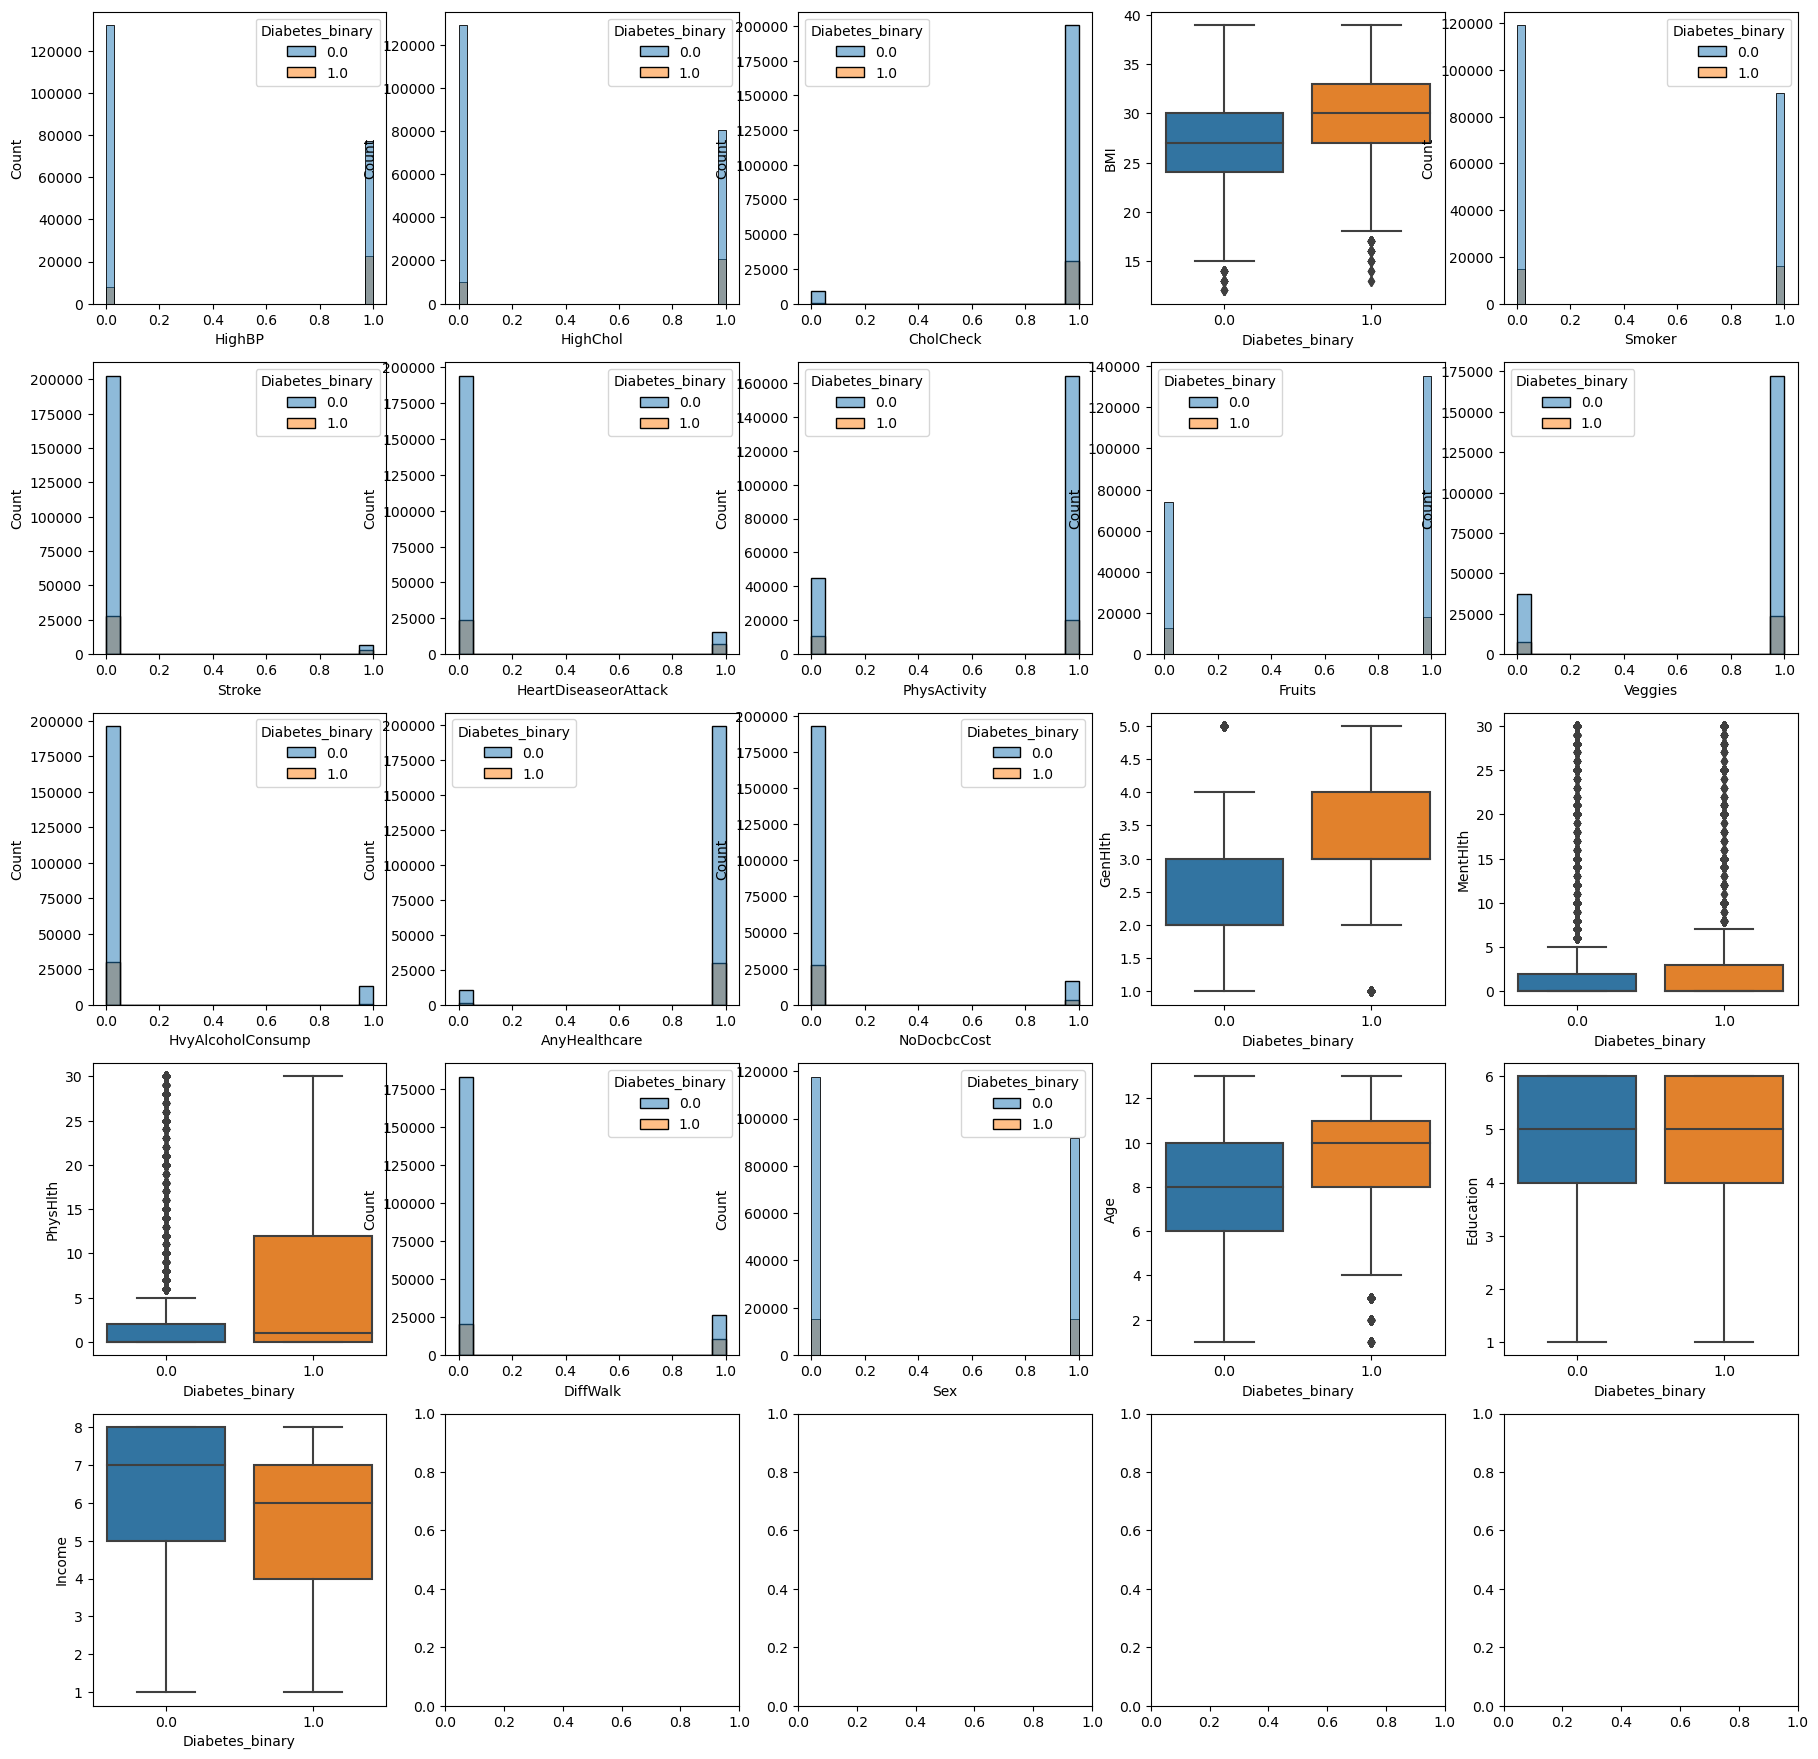

In [111]:
make_figures()

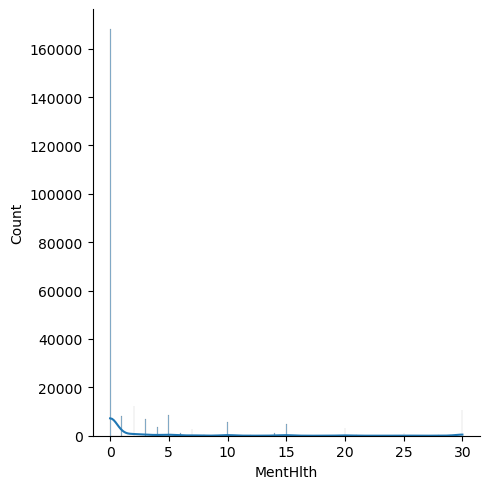

In [116]:
sns.displot(df.MentHlth, kde = True)

In [117]:
from sklearn.model_selection import train_test_split
X = df.drop("Diabetes_binary", axis = 1)
y = df["Diabetes_binary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(learning_rate= 1.0, n_estimators= 50)

In [118]:
model.fit(X_train, y_train)

AdaBoostClassifier()

In [119]:
pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93     68924
         1.0       0.53      0.15      0.23     10258

    accuracy                           0.87     79182
   macro avg       0.71      0.56      0.58     79182
weighted avg       0.84      0.87      0.84     79182



f1 score has actually went down

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
model = LogisticRegression()

In [122]:
model.fit(X_train, y_train)

C:\Users\shake\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [123]:
pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     68924
         1.0       0.50      0.11      0.17     10258

    accuracy                           0.87     79182
   macro avg       0.69      0.54      0.55     79182
weighted avg       0.83      0.87      0.83     79182



In [137]:
model.coef_.tolist()[0]

[0.9170672872171988,
 0.6807084368034974,
 -0.9453200957096388,
 0.060584275101141116,
 -0.16281670484035904,
 0.16651199939665834,
 0.32467345797499136,
 -0.12524555915328575,
 -0.0011757206932357205,
 -0.08911481693618653,
 -1.086855912392907,
 -0.7311896160413919,
 -0.45391824750404197,
 0.43085385895186323,
 -0.001824143630440902,
 -0.007201873805688431,
 0.19271688704096418,
 0.18512989255873982,
 0.07510032111187022,
 -0.061906495484728916,
 -0.07143857070201184]

In [131]:
X.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [138]:
res = {X.columns[i]: model.coef_.tolist()[0][i] for i in range(len(X.columns))}

In [139]:
res

{'HighBP': 0.9170672872171988,
 'HighChol': 0.6807084368034974,
 'CholCheck': -0.9453200957096388,
 'BMI': 0.060584275101141116,
 'Smoker': -0.16281670484035904,
 'Stroke': 0.16651199939665834,
 'HeartDiseaseorAttack': 0.32467345797499136,
 'PhysActivity': -0.12524555915328575,
 'Fruits': -0.0011757206932357205,
 'Veggies': -0.08911481693618653,
 'HvyAlcoholConsump': -1.086855912392907,
 'AnyHealthcare': -0.7311896160413919,
 'NoDocbcCost': -0.45391824750404197,
 'GenHlth': 0.43085385895186323,
 'MentHlth': -0.001824143630440902,
 'PhysHlth': -0.007201873805688431,
 'DiffWalk': 0.19271688704096418,
 'Sex': 0.18512989255873982,
 'Age': 0.07510032111187022,
 'Education': -0.061906495484728916,
 'Income': -0.07143857070201184}

<Axes: >

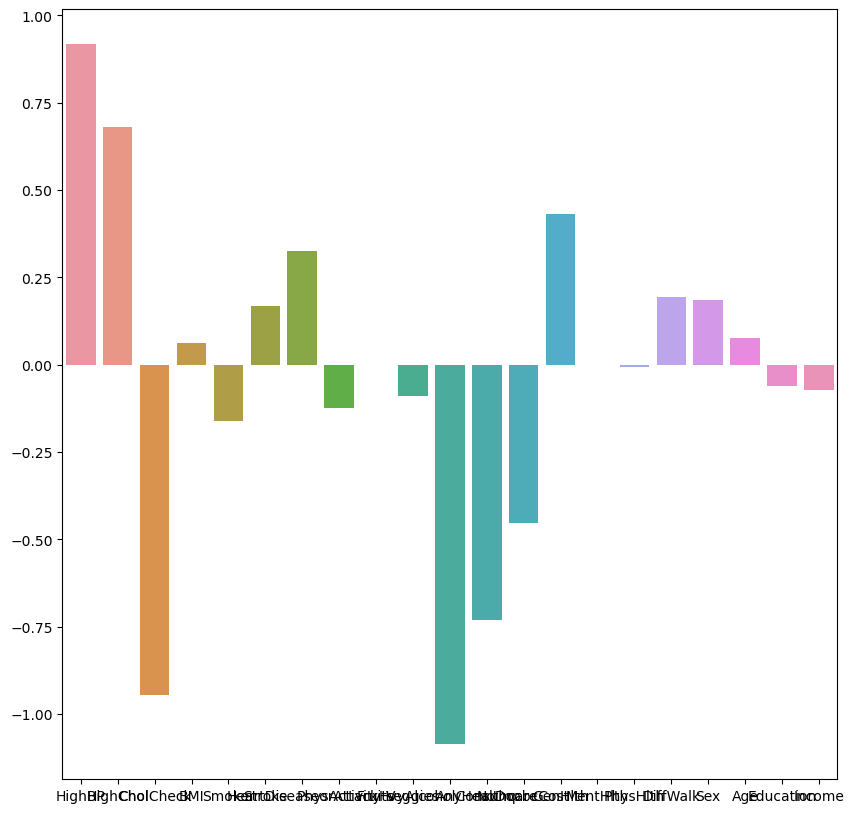

In [147]:
plt.figure(figsize = (10,10))

sns.barplot(x = X.columns, y= model.coef_.tolist()[0])


In [154]:
from sklearn.neighbors import NearestNeighbors
df1 = X_train.copy()
df1["Diabetes_binary"] = y_train


healthy_data = df1[df1.Diabetes_binary == 0].drop("Diabetes_binary", axis = 1)
sick_data = df1[df1.Diabetes_binary == 1].drop("Diabetes_binary", axis = 1)

# Create a Nearest Neighbors model using healthy data
nn_model = NearestNeighbors(n_neighbors=1, metric='euclidean')
nn_model.fit(healthy_data)

# Find the closest healthy counterpart for each sick data point
closest_healthy_indices = nn_model.kneighbors(sick_data, return_distance=False).flatten()

# Extract the corresponding healthy data points
closest_healthy_data = healthy_data.iloc[closest_healthy_indices, :]

# Combine sick and closest healthy data points to create a balanced dataset
balanced_X = np.concatenate([sick_data, closest_healthy_data])
balanced_y = np.concatenate([np.ones(len(sick_data)), np.zeros(len(closest_healthy_data))])


NearestNeighbors(metric='euclidean', n_neighbors=1)

In [155]:
model = LogisticRegression()
model.fit(balanced_X, balanced_y)

C:\Users\shake\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [156]:
pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.91      0.75      0.82     68924
         1.0       0.23      0.50      0.32     10258

    accuracy                           0.72     79182
   macro avg       0.57      0.63      0.57     79182
weighted avg       0.82      0.72      0.76     79182



C:\Users\shake\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [179]:
df_balanced = pd.concat([balanced_X, balanced_y], axis = 1)

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [180]:
df_balanced = pd.concat([pd.DataFrame(balanced_X, columns = X_train.columns), pd.DataFrame(balanced_y, columns = ['Diabetes_binary'])], axis = 1)

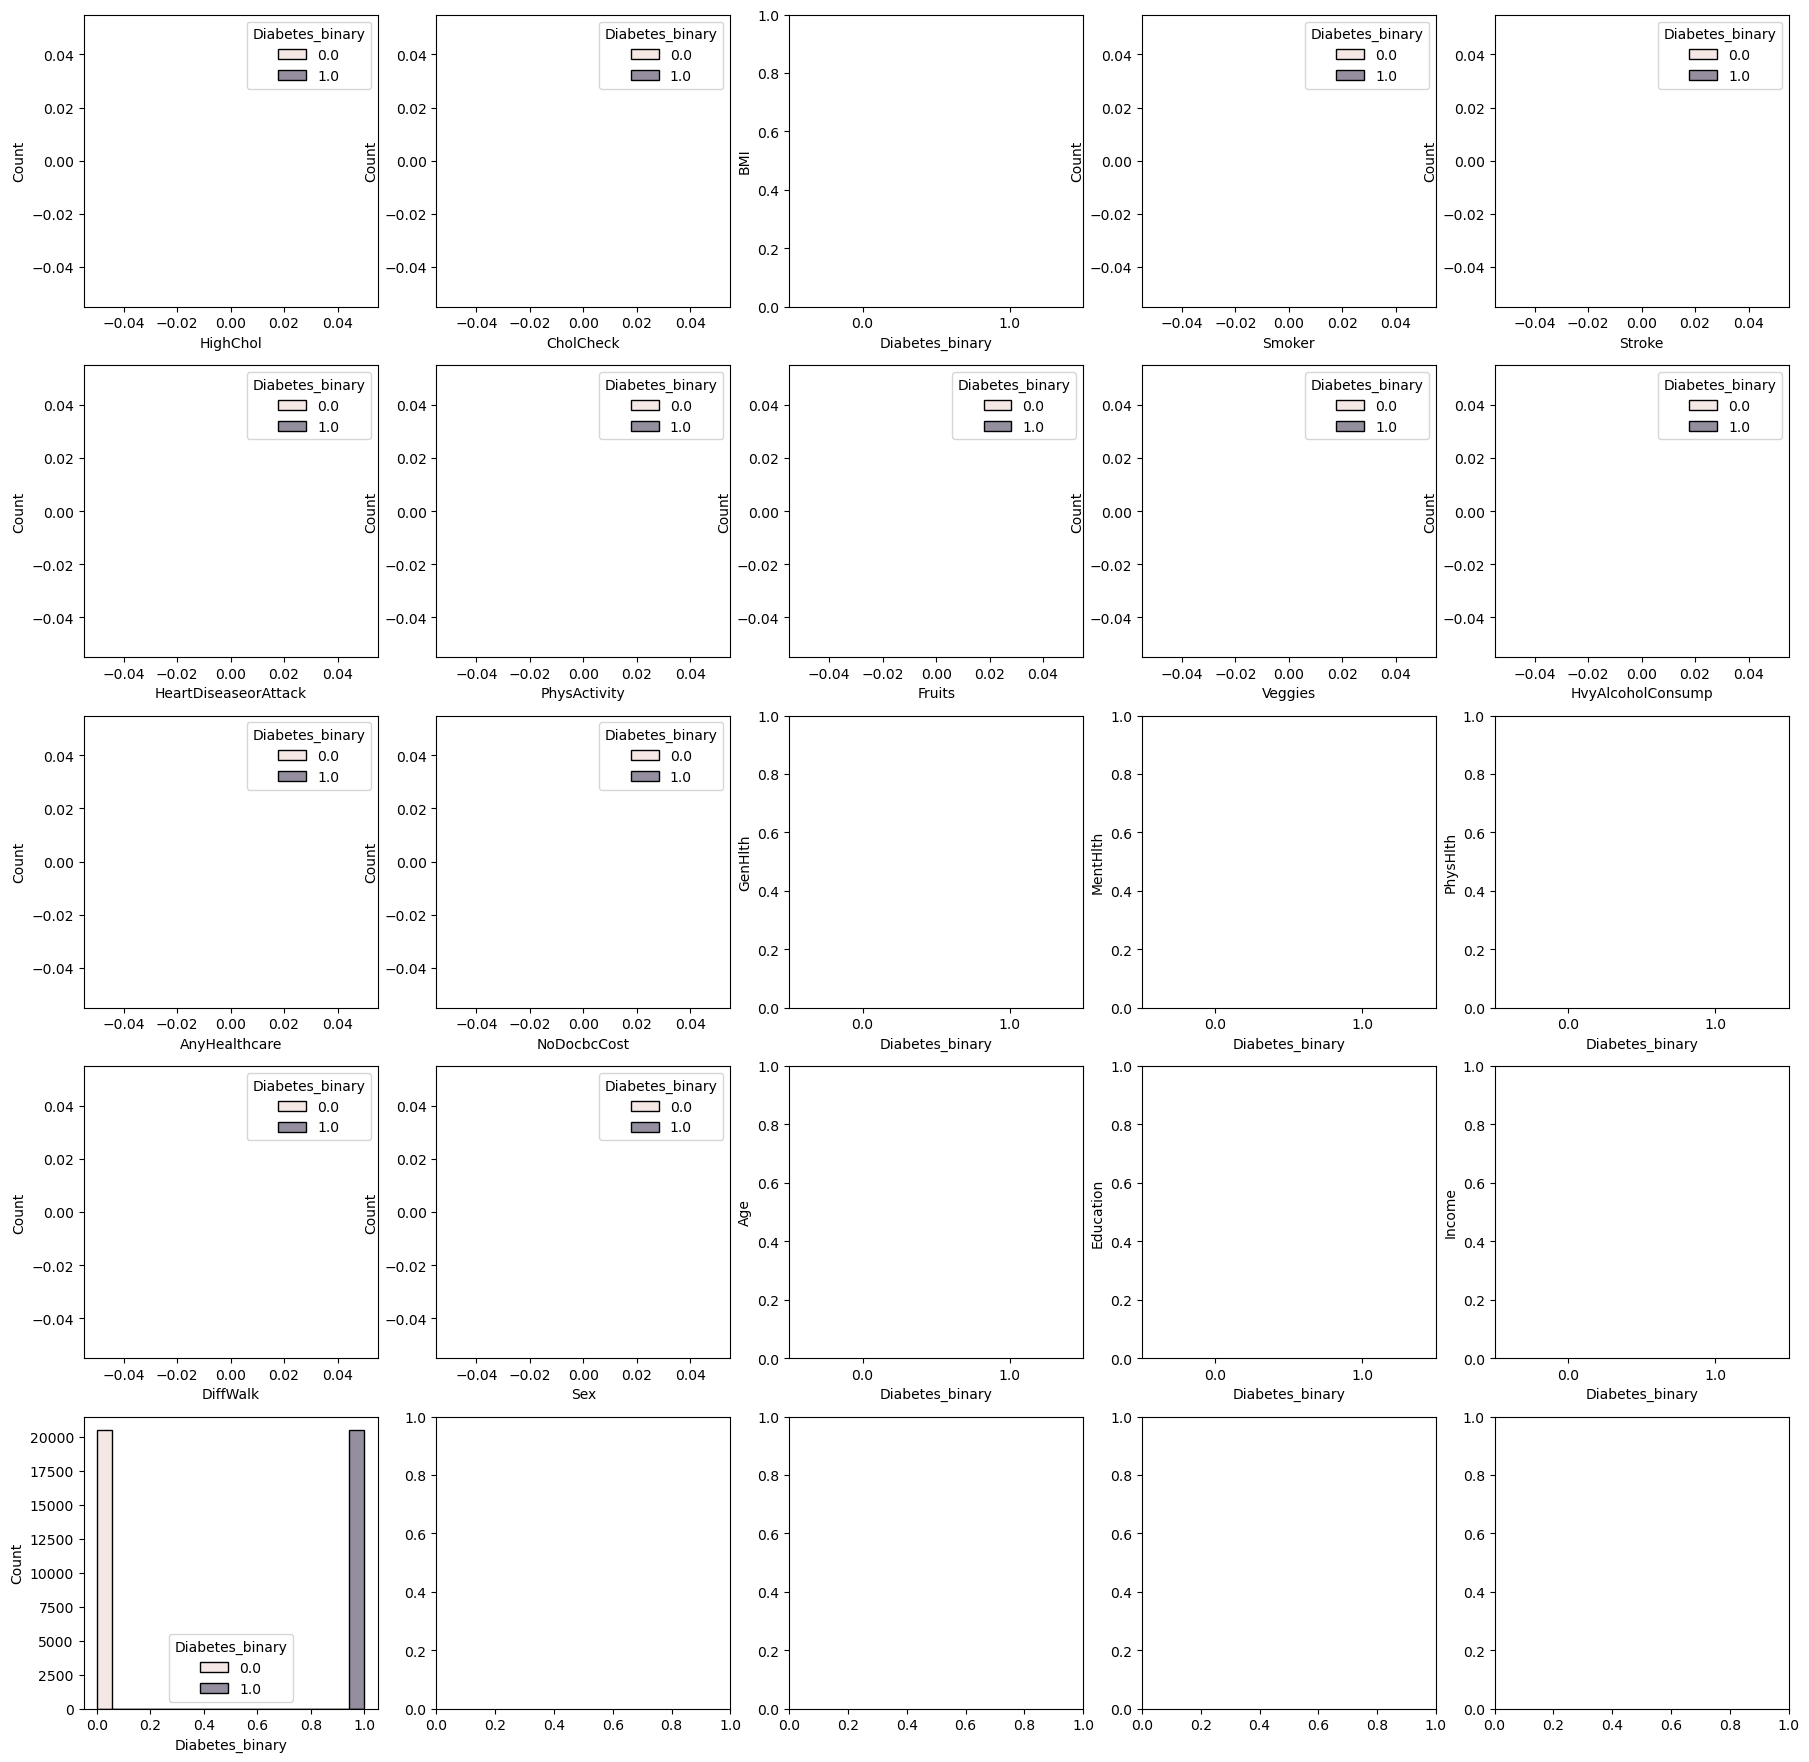

In [172]:
make_figures(df_balanced)

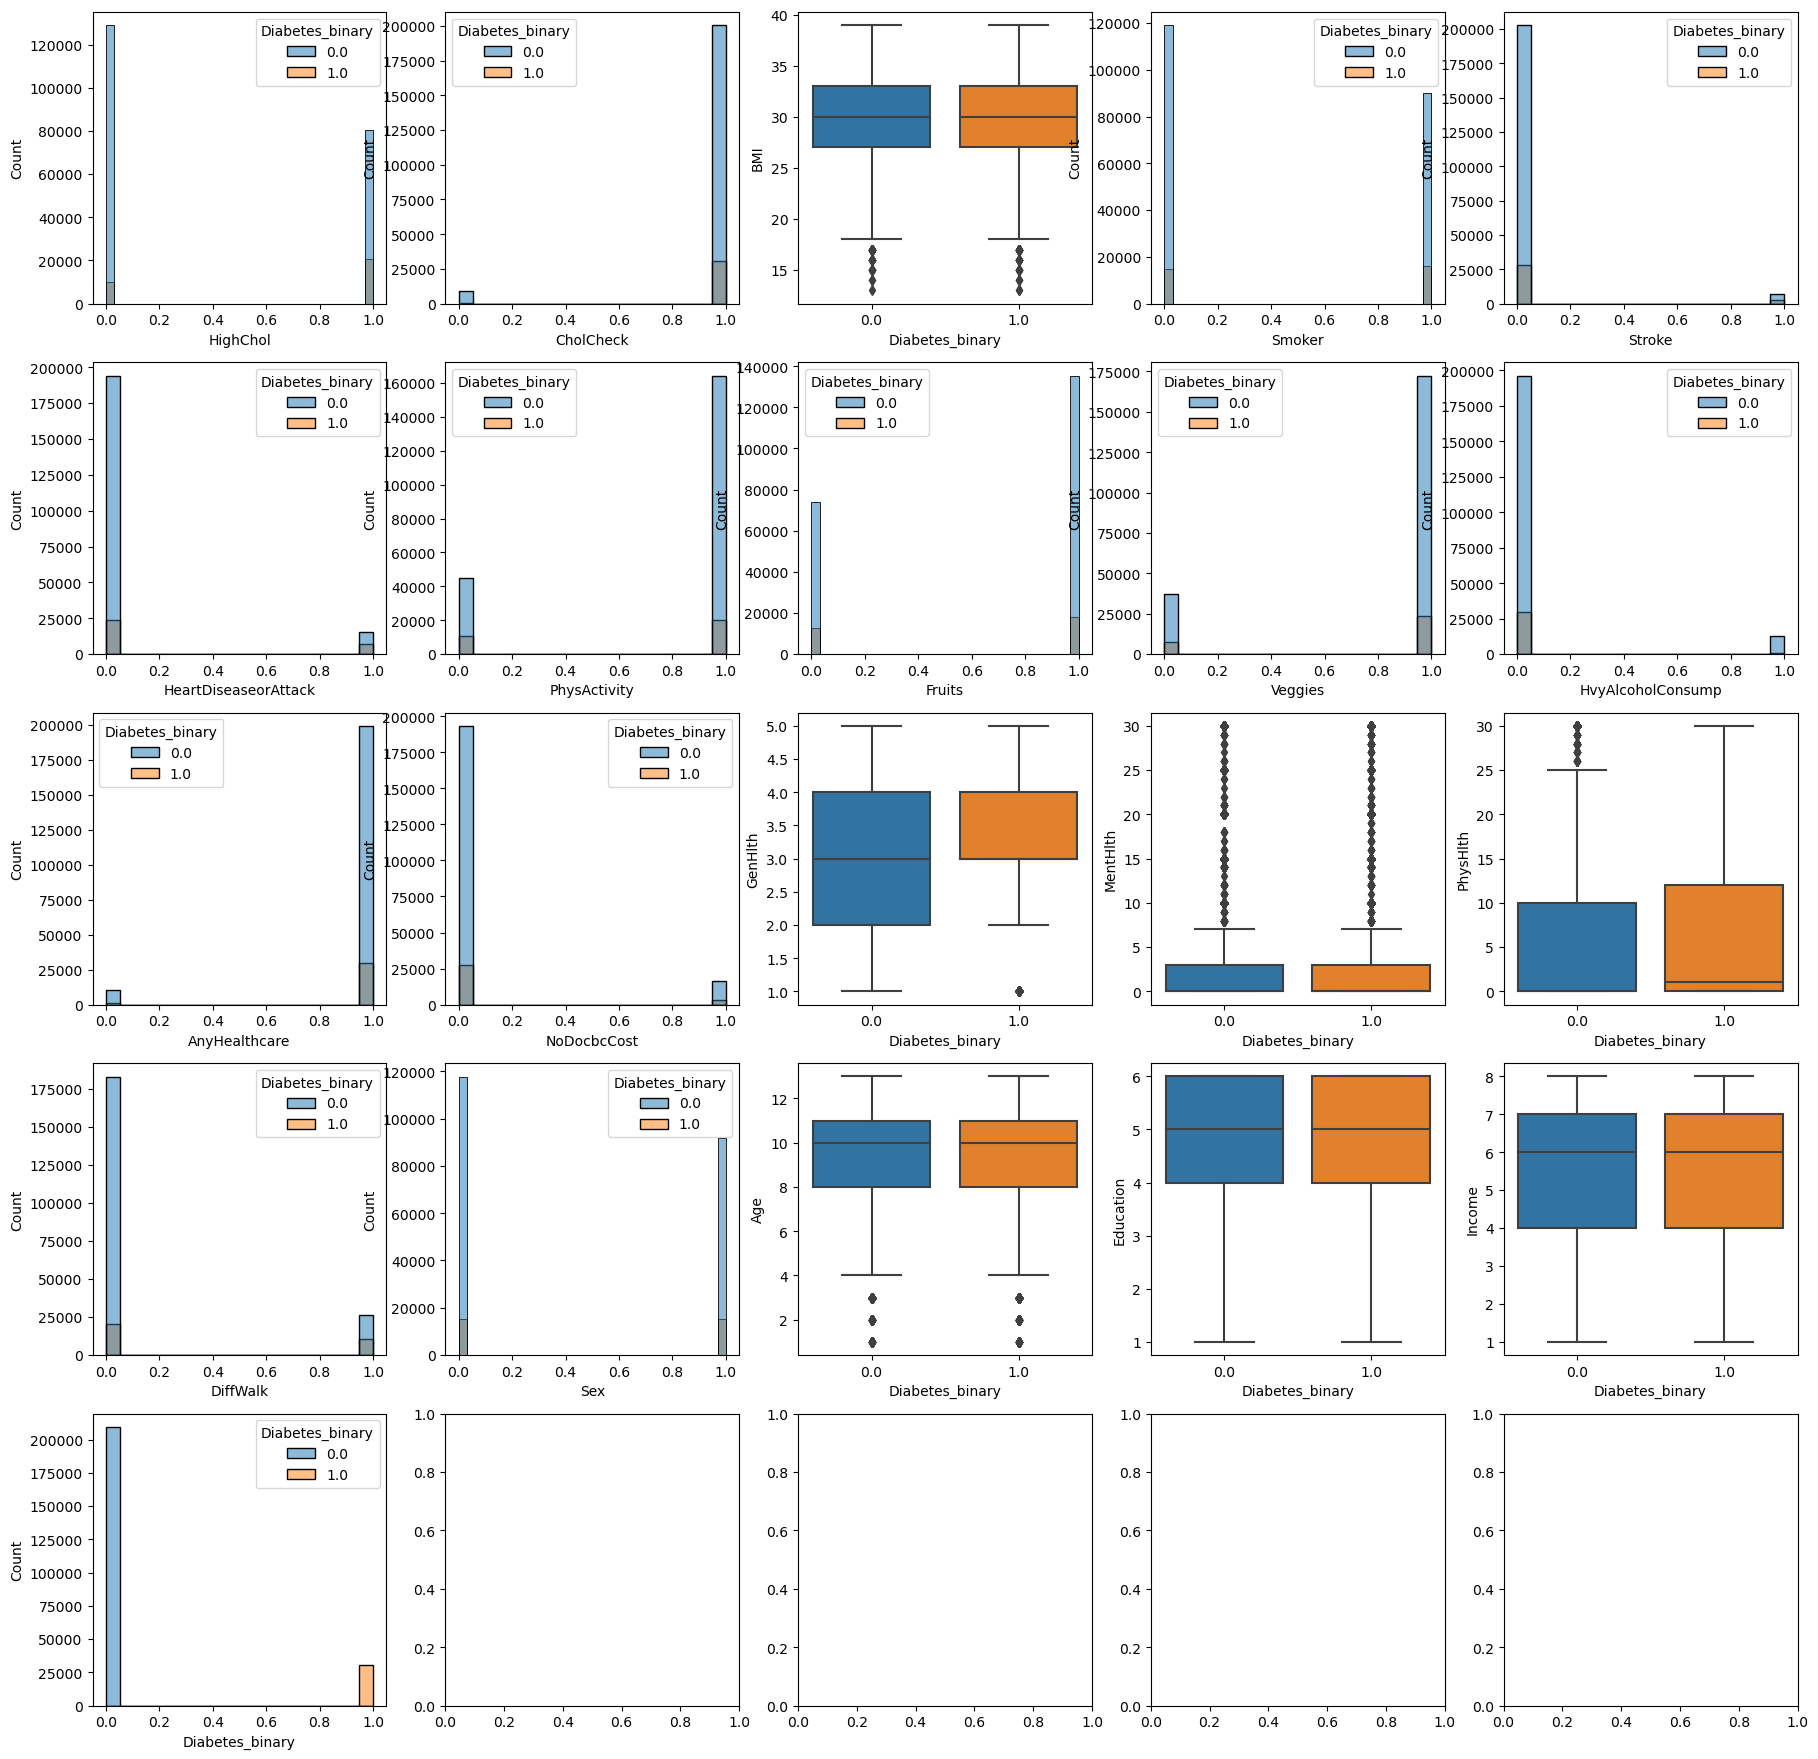

In [182]:
counter = 1
fig, axs = plt.subplots(5,5, figsize = (22,22))
for i in range(5):
    for j in range(5):
        ax = axs[i,j]
        if df_balanced[df_balanced.columns[counter]].nunique() == 2:
            sns.histplot(data =df , x = df_balanced.columns[counter], hue = "Diabetes_binary", ax = ax)
        else: 
            sns.boxplot(data=df_balanced, x="Diabetes_binary", y=df_balanced.columns[counter],  ax = ax)
        counter +=1
        if counter == len(df.columns):
            break

<Axes: xlabel='Diabetes_binary', ylabel='BMI'>

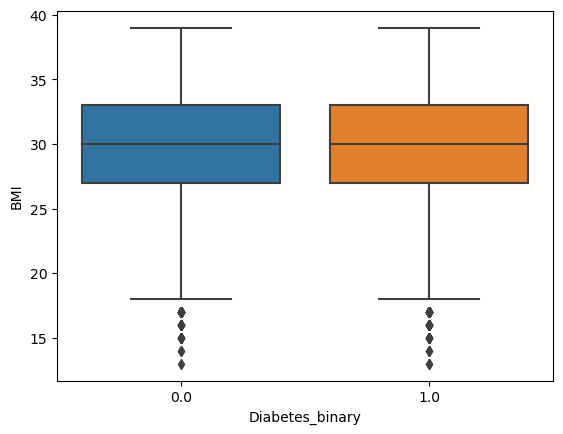

In [181]:
sns.boxplot(data=df_balanced, x="Diabetes_binary", y=df_balanced["BMI"])

In [183]:
df_balanced

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1.0,1.0,1.0,32.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0,1.0
1,1.0,0.0,1.0,36.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,3.0,0.0,2.0,0.0,1.0,9.0,5.0,8.0,1.0
2,1.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,10.0,3.0,7.0,1.0
3,1.0,1.0,1.0,30.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,4.0,0.0,15.0,1.0,1.0,11.0,5.0,6.0,1.0
4,1.0,1.0,1.0,38.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,5.0,30.0,30.0,1.0,1.0,9.0,4.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40957,0.0,0.0,1.0,30.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,4.0,0.0,10.0,0.0,0.0,12.0,4.0,5.0,0.0
40958,1.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,12.0,4.0,6.0,0.0
40959,1.0,1.0,1.0,32.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,4.0,2.0,0.0,0.0,1.0,12.0,6.0,7.0,0.0
40960,1.0,0.0,1.0,34.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,3.0,3.0,2.0,0.0,0.0,6.0,6.0,8.0,0.0


In [184]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(balanced_X, balanced_y)

AdaBoostClassifier()

In [185]:
pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

C:\Users\shake\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.89      0.62      0.73     68924
         1.0       0.16      0.50      0.25     10258

    accuracy                           0.60     79182
   macro avg       0.53      0.56      0.49     79182
weighted avg       0.80      0.60      0.67     79182



In [186]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(balanced_X, balanced_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [187]:
pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.90      0.66      0.76     68924
         1.0       0.19      0.52      0.27     10258

    accuracy                           0.64     79182
   macro avg       0.54      0.59      0.52     79182
weighted avg       0.81      0.64      0.70     79182



In [193]:
from sklearn.linear_model import LogisticRegression

In [195]:
model = LogisticRegression()
model.fit(balanced_X, balanced_y)

C:\Users\shake\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [196]:
pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.91      0.75      0.82     68924
         1.0       0.23      0.50      0.32     10258

    accuracy                           0.72     79182
   macro avg       0.57      0.63      0.57     79182
weighted avg       0.82      0.72      0.76     79182



C:\Users\shake\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [208]:
model = LogisticRegression()
model.fit(balanced_X, balanced_y)
pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.91      0.75      0.82     68924
         1.0       0.23      0.50      0.32     10258

    accuracy                           0.72     79182
   macro avg       0.57      0.63      0.57     79182
weighted avg       0.82      0.72      0.76     79182



C:\Users\shake\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shake\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [213]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [244]:
early_stopping = EarlyStopping(monitor="val_loss", mode=min , patience= 25, verbose= 1)
model = Sequential()

model.add(Dense(units = 20, activation= "relu"))
model.add(Dropout(0.2))
model.add(Dense(units = 18, activation= "relu"))
model.add(Dropout(0.2))
model.add(Dense(units = 18, activation= "relu"))
model.add(Dropout(0.2))

model.add(Dense(units = 15, activation= "relu"))
model.add(Dropout(0.2))

model.add(Dense(units = 15, activation= "relu"))
model.add(Dropout(0.2))

model.add(Dense(units = 10, activation= "relu"))
model.add(Dropout(0.2))

model.add(Dense(units = 5, activation= "relu"))


model.add(Dense(units = 1, activation= "sigmoid"))

model.compile(optimizer= "adam", loss= "binary_crossentropy")

In [245]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(balanced_X)
X_test = scaler.transform(X_test)


history = model.fit(x = balanced_X, y = balanced_y, epochs=10,verbose = 1, validation_data = (X_test, y_test), callbacks= [early_stopping])

Epoch 1/10
1281/1281 [==============================] - 12s 8ms/step - loss: 0.6958 - val_loss: 0.6897
Epoch 2/10
1281/1281 [==============================] - 10s 8ms/step - loss: 0.6932 - val_loss: 0.6911
Epoch 3/10
1281/1281 [==============================] - 10s 8ms/step - loss: 0.6932 - val_loss: 0.6982
Epoch 4/10
1281/1281 [==============================] - 10s 8ms/step - loss: 0.6932 - val_loss: 0.6947
Epoch 5/10
1281/1281 [==============================] - 10s 8ms/step - loss: 0.6932 - val_loss: 0.6946
Epoch 6/10
1281/1281 [==============================] - 10s 8ms/step - loss: 0.6932 - val_loss: 0.6885
Epoch 7/10
1281/1281 [==============================] - 10s 8ms/step - loss: 0.6932 - val_loss: 0.6908
Epoch 8/10
1281/1281 [==============================] - 10s 8ms/step - loss: 0.6932 - val_loss: 0.6966
Epoch 9/10
1281/1281 [==============================] - 10s 8ms/step - loss: 0.6932 - val_loss: 0.6896
Epoch 10/10
1281/1281 [==============================] - 10s 8ms/step - l

<Axes: >

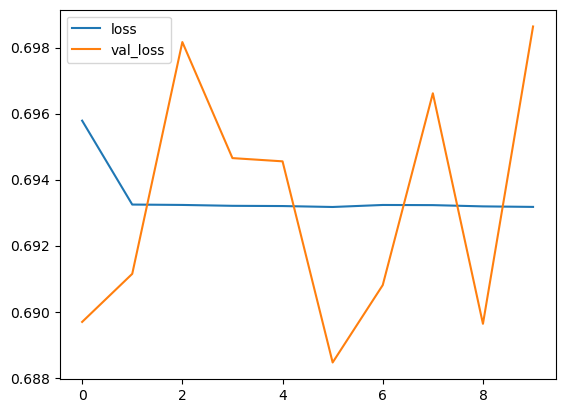

In [246]:
pd.DataFrame(history.history).plot()

In [248]:
pred = np.round(model.predict(X_test))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

2475/2475 [==============================] - 6s 2ms/step
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     68924
         1.0       0.13      1.00      0.23     10258

    accuracy                           0.13     79182
   macro avg       0.06      0.50      0.11     79182
weighted avg       0.02      0.13      0.03     79182



C:\Users\shake\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shake\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shake\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
